### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from IPython.display import display, Markdown
from google.colab import drive

%matplotlib inline


from PIL import Image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras.optimizers import SGD
from keras.optimizers.schedules import ExponentialDecay
from keras import callbacks
from keras.models import load_model

### Exploratory Data Analysis

In [2]:
drive.mount('/content/drive')
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Data'))

Mounted at /content/drive
['AguafinaScript', 'Allura', 'OpenSans', 'I Love Glitter', 'alsscrp', 'James Fajardo', 'AlexBrush', 'Holligate Signature', 'Canterbury', 'GreatVibes']


In [3]:
data_path = 'drive/My Drive/Colab Notebooks/Data/'
font_AguafinaScript = os.path.join(data_path+'AguafinaScript')

In [4]:
font_AguafinaScript_files = os.listdir(font_AguafinaScript)

In [5]:
print(font_AguafinaScript_files[:5])

['image_45.png', 'image_82.png', 'image_31.png', 'image_30.png', 'image_46.png']


In [6]:
font_AlexBrush = os.path.join(data_path+'AlexBrush')

font_Allura = os.path.join(data_path+'Allura')

font_alsscrp = os.path.join(data_path+'alsscrp')

font_Canterbury = os.path.join(data_path+'Canterbury')

font_GreatVibes = os.path.join(data_path+'GreatVibes')

font_Holligate_Signature = os.path.join(data_path+'Holligate Signature')

font_I_Love_Glitter = os.path.join(data_path+'I Love Glitter')

font_James_Fajardo = os.path.join(data_path+'James Fajardo')

font_OpenSans = os.path.join(data_path+'OpenSans')

dir_list = [font_AguafinaScript,font_AlexBrush,font_Allura,font_alsscrp,font_Canterbury,font_GreatVibes,
            font_Holligate_Signature,font_I_Love_Glitter,font_James_Fajardo,font_OpenSans]



## <b><u>Images from drive/My Drive/Colab Notebooks/Data/AguafinaScript, Total Images: 83</u></b>

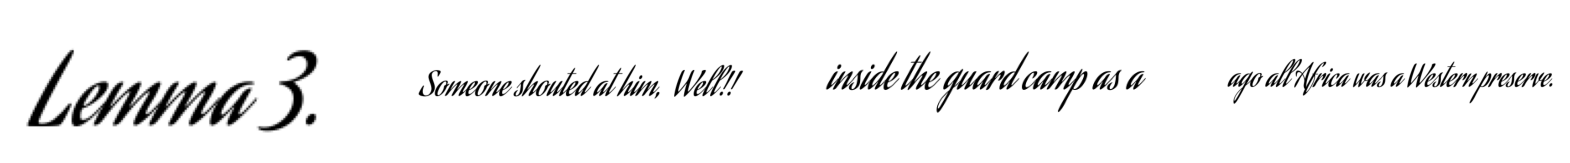

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/AlexBrush, Total Images: 78</u></b>

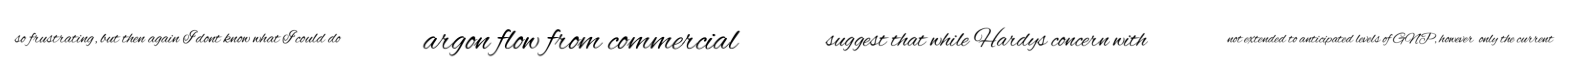

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/Allura, Total Images: 70</u></b>

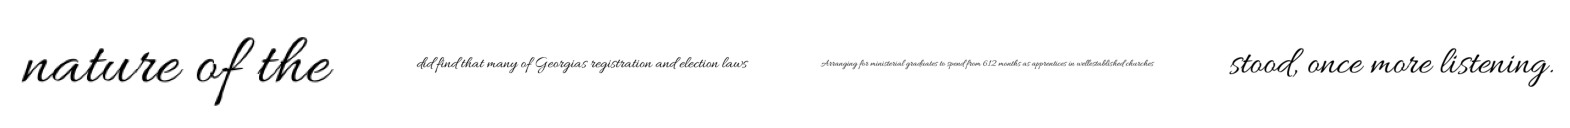

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/alsscrp, Total Images: 102</u></b>

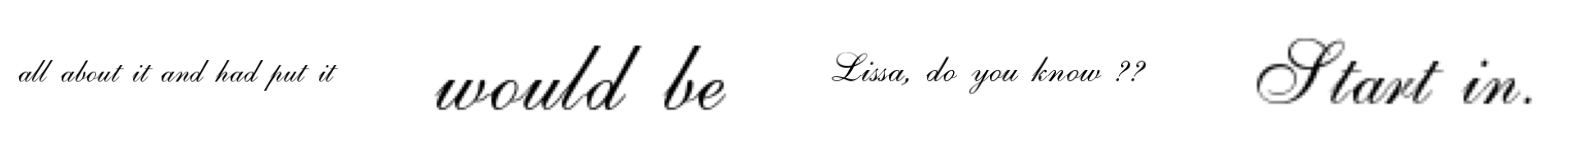

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/Canterbury, Total Images: 76</u></b>

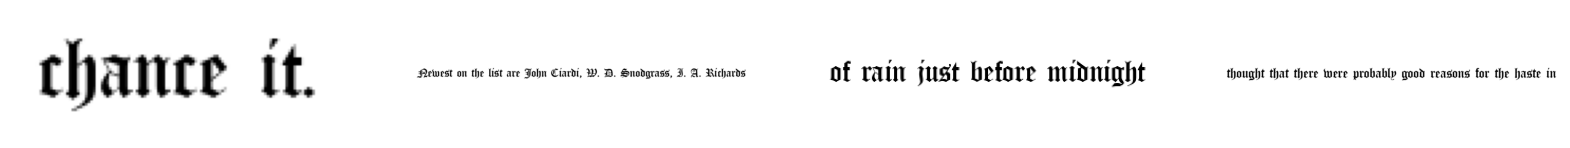

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/GreatVibes, Total Images: 76</u></b>

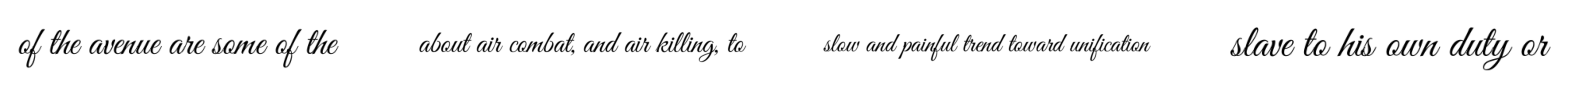

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/Holligate Signature, Total Images: 82</u></b>

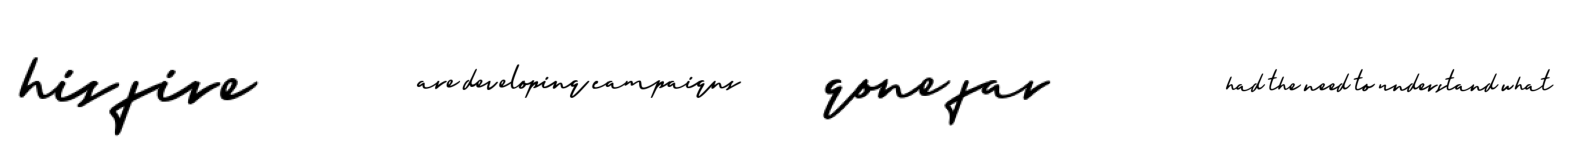

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/I Love Glitter, Total Images: 72</u></b>

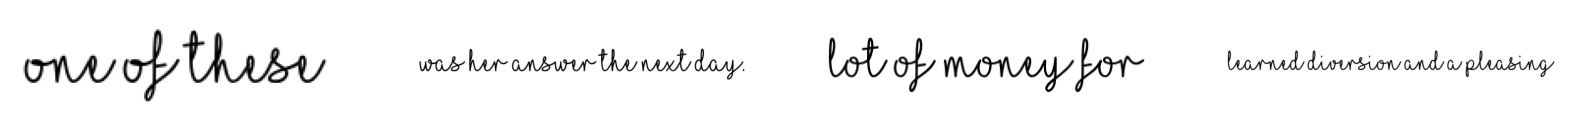

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/James Fajardo, Total Images: 80</u></b>

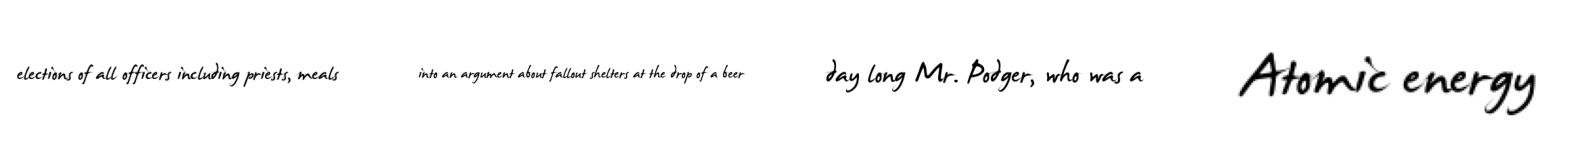

## <b><u>Images from drive/My Drive/Colab Notebooks/Data/OpenSans, Total Images: 73</u></b>

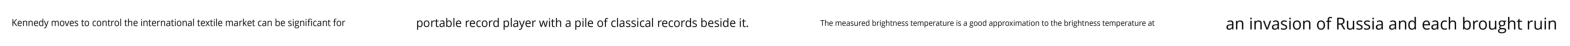

In [7]:
for dir_name in dir_list:

    image_list = [os.path.join(dir_name,fname) for fname in os.listdir(dir_name)[0:4]]

    total_images = len(os.listdir(dir_name))

    display(Markdown(f"## <b><u>Images from {dir_name}, Total Images: {total_images}</u></b>"))


    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(20, 5))

    for i, img_path in enumerate(image_list):

        img = mpimg.imread(img_path)
        if len(image_list) == 1:
            ax = axes
        else:
            ax = axes[i]
        ax.imshow(img)
        ax.axis('off')
    plt.show()

### Data Preprocessing

In [8]:
def convert_label(label):
    if label == 'AguafinaScript':
        return 0
    elif label == 'AlexBrush':
        return 1
    elif label == 'Allura':
        return 2
    elif label == 'alsscrp':
        return 3
    elif label == 'Canterbury':
        return 4
    elif label == 'GreatVibes':
        return 5
    elif label == 'Holligate Signature':
        return 6
    elif label == 'I Love Glitter':
        return 7
    elif label == 'James Fajardo':
        return 8
    elif label == 'OpenSans':
        return 9

In [ ]:
X_data = []

Y_data = []


for dir_name in dir_list:

    font_label = dir_name.split(os.path.sep)[-1]

    num_label = convert_label(font_label)

    for fname in os.listdir(dir_name):

        try:
            img = Image.open(os.path.join(dir_name,fname))

            img=img.resize((105,105))

            img.load()

            img_data = np.asarray(img, dtype=np.int16)
            X_data.append(img_data)
            Y_data.append(num_label)
        except:
            None


print(len(X_data))
print(len(Y_data))


In [ ]:
X_data = np.asarray(X_data, dtype="float") / 255.0
Y_data = np.array(Y_data)
print("Success")


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(X_data,
	Y_data, test_size=0.25, random_state=42)
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

### Model Building

In [31]:
model = Sequential([
    # Note the input shape is the desired size of the image 28x28 with 3 bytes color
    # This is the first convolution
    Conv2D(64, (48,48), activation='relu', input_shape=(105,105,3)),
    MaxPooling2D(2, 2),
    # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    Conv2D(128, (24,24), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 58, 58, 64)        442432    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         4718720   
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1152)             

In [33]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])


In [34]:
filepath='drive/My Drive/Colab Notebooks/Data/top_model.h5'
batch_size = 128
epochs = 50

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),callbacks=[checkpoint])
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.0791 
Epoch 1: val_loss improved from inf to 0.08994, saving model to top_model.h5
5/5 [==============================] - 142s 29s/step - loss: 0.0904 - accuracy: 0.0791 - val_loss: 0.0899 - val_accuracy: 0.1010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - ETA: 0s - loss: 0.0901 - accuracy: 0.0808 
Epoch 2: val_loss improved from 0.08994 to 0.08988, saving model to top_model.h5
5/5 [==============================] - 141s 29s/step - loss: 0.0901 - accuracy: 0.0808 - val_loss: 0.0899 - val_accuracy: 0.1465
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.1229 
Epoch 3: val_loss improved from 0.08988 to 0.08980, saving model to top_model.h5
5/5 [==============================] - 132s 26s/step - loss: 0.0900 - accuracy: 0.1229 - val_loss: 0.0898 - val_accuracy: 0.1515
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0898 - accuracy: 0.1145 
Epoch 4: val_loss improved from 0.08980 to 0.08965, saving model to top_model.h5
5/5 [==============================] - 138s 29s/step - loss: 0.0898 - accuracy: 0.1145 - val_loss: 0.0896 - val_accuracy: 0.2222
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.1414 
Epoch 5: 

In [2]:

model = load_model('drive/My Drive/Colab Notebooks/Data/top_model.h5')
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

OSError: No file or directory found at top_model.h5

In [30]:
img_path='sample/sample.jpg'

pil_im =PIL.Image.open(img_path).convert('L')
pil_im=blur_image(pil_im)
org_img = img_to_array(pil_im)
def rev_conv_label(label):
    if label == 0 :
        return 'Lato'
    elif label == 1:
        return 'Raleway'
    elif label == 2 :
        return 'Roboto'
    elif label == 3 :
        return 'Sansation'
    elif label == 4:
        return 'Walkway'
data=[]
data.append(org_img)
data = np.asarray(data, dtype="float") / 255.0
y = model.predict(data)
y = np.round(y).astype(int)
label = rev_conv_label(y[0,0])
fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, label , bbox={'facecolor': 'white', 'pad': 10})
plt.show()


(594, 105, 105, 3)
